# Decision trees

Using decision trees for classification. Based on Ch16 of Murphy, *Machine learning: A probabilistic perspective*.

Author: Juvid Aryaman

In [1]:
import mystyle.sty as sty # see https://github.com/jaryaman/mystyle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import graphviz

In [2]:
sty.reset_plots()
sty.update_functions_on_fly()
sty.ignore_warnings_all()

## Look at the Iris dataset

This is a dataset with 4 features, 3 classes, and 150 examples. 

In [3]:
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
X = iris.data
X.shape

(150, 4)

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
y = iris.target
y.shape

(150,)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

As is customary, let's just take the first two features from this dataset and take a look at them

In [9]:
np.unique(y)

array([0, 1, 2])

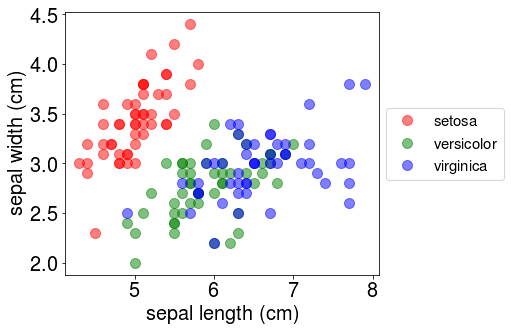

In [10]:
fig, ax = plt.subplots(1,1,figsize=(7.5,5))
colors = ['r','g','b']
for i, class_label in enumerate(iris.target_names):
    idxs = y==i
    ax.plot(X[idxs,0],X[idxs,1],'o',label=class_label,color=colors[i], alpha = 0.5)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
sty.remove_tex_axis(ax,ytick_fmt="%.1f")
sty.legend_outside(ax)
plt.tight_layout()

## Decision tree classifier

Decision trees involve recursively partitioning the input space by defining a local model in each resulting region of the input space. This can be represented as a tree. 

Growing a decision tree tends to involve a number of stopping heuristics, such as stopping when:

- The reduction of the cost function is too small
- The tree has exceeded a maximum depth
- The number of examples in a leaf has become too small

NB: decision trees can be used for **regression** too, where the leaf corresponds to the mean response in the defined region of the input space.


In [11]:
from sklearn import tree

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X[:,:2], y); # only supply the first two features

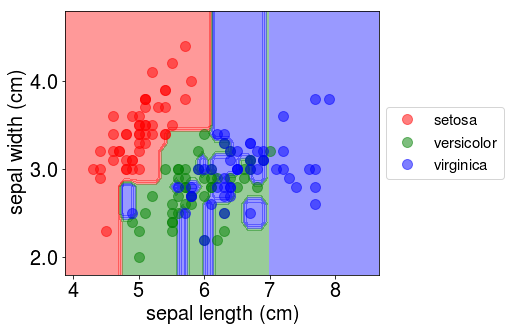

In [13]:
fig, ax = plt.subplots(1,1,figsize=(7.5,5))
sty.plot_decision_boundary_2D(X[:,:2],clf,ax_handle=ax, colors=colors)
for i, class_label in enumerate(iris.target_names):
    idxs = y==i
    ax.plot(X[idxs,0],X[idxs,1],'o',label=class_label, color=colors[i], alpha = 0.5)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
sty.remove_tex_axis(ax,ytick_fmt="%.1f")
sty.legend_outside(ax)
plt.tight_layout()

We can visualize the learnt decision tree:

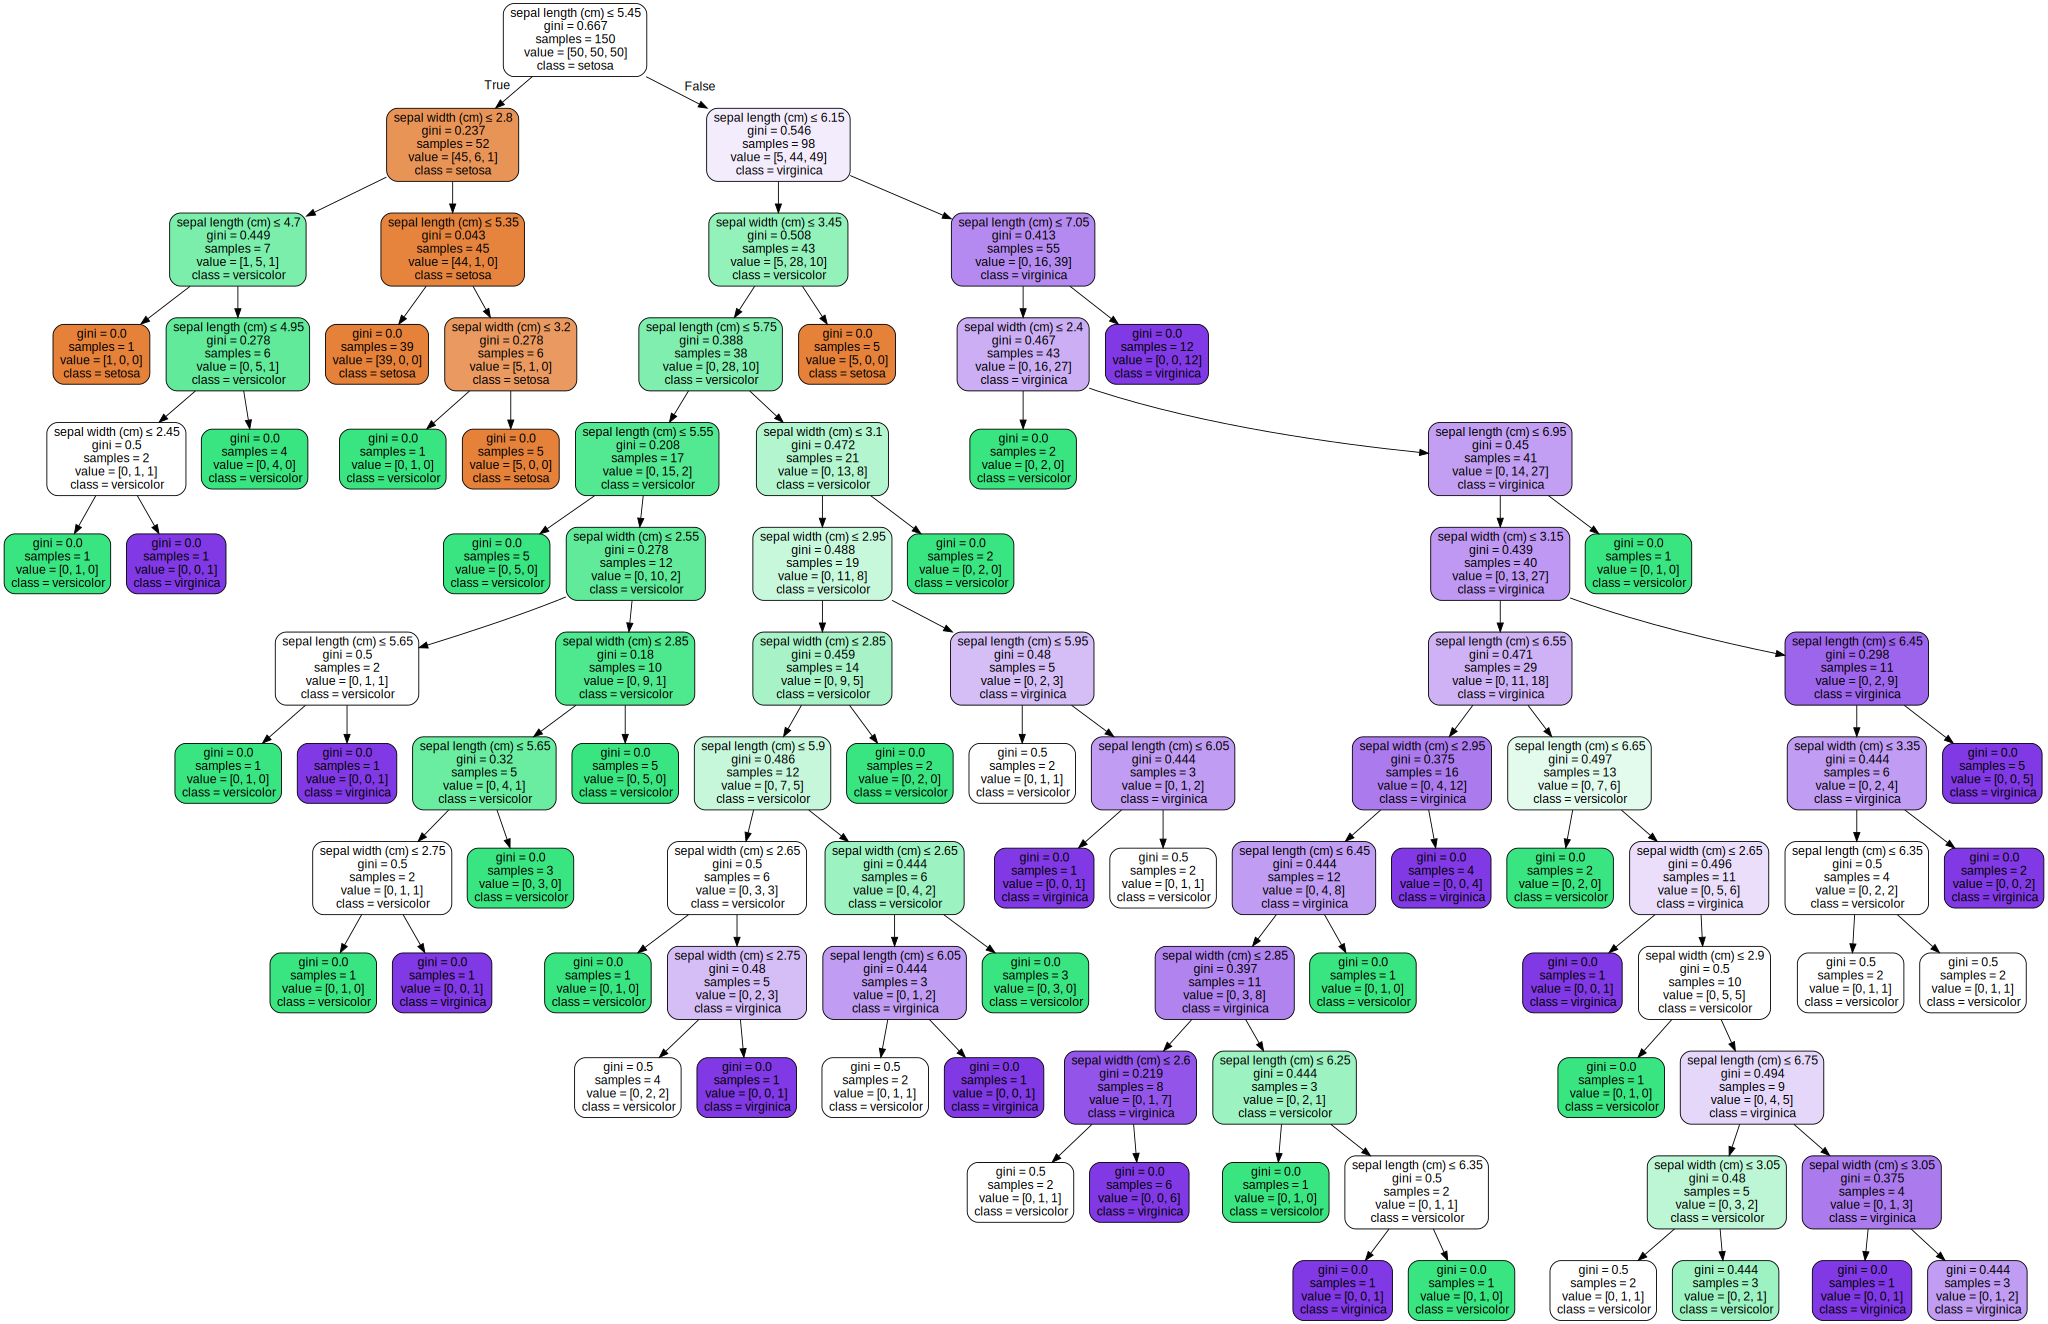

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names[:2],  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)  
graph

## Random forests

Just from inspection, you can see that a naive decision tree is a pretty high-variance estimator (i.e. it's overfitting). There are decision regions which have surrounded single data points -- this isn't a good sign. A popular solution to this is to use a **random forest**. 

A random forest bootstraps the data and estimates a tree for each bootstrapped iteration. To make a prediction, we take the mean prediction across the bootstrapped trees (this is called **bootstrap aggregating**, or 'bagging'). This alone can result in highly correlated predictors. To get around this, the random forest algorithm takes a random subset of the input features (called the **random subspace method**), as well as a random subset of data cases. It turns out that this can reduce the variance of the estimator.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [17]:
clf.fit(X[:,:2], y);

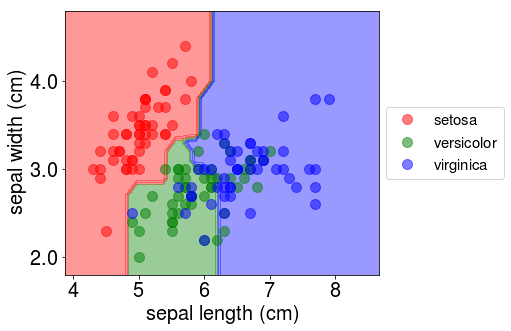

In [18]:
fig, ax = plt.subplots(1,1,figsize=(7.5,5))
sty.plot_decision_boundary_2D(X[:,:2],clf,ax_handle=ax, colors=colors)
for i, class_label in enumerate(iris.target_names):
    idxs = y==i
    ax.plot(X[idxs,0],X[idxs,1],'o',label=class_label, color=colors[i], alpha = 0.5)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
sty.remove_tex_axis(ax,ytick_fmt="%.1f")
sty.legend_outside(ax)
plt.tight_layout()

We see we have much cleaner decision boundaries relative to a naive decision tree. Intuitively, this ought to generalise better. There is still an arbitrary parameter here -- the maximum depth -- which we could choose through cross-validation.